# BL40A2020 Wireless Communication Systems

## Week 1: Signals and systems

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Plot in pyhton

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

#### Library for symbolic calculation

[Sympy basics](https://www.scipy-lectures.org/packages/sympy.html)

[Sympy documentation](https://docs.sympy.org/latest/index.html)

#### Library for signal processing using numerical methods

[Scipy signal](https://docs.scipy.org/doc/scipy-1.0.0/reference/signal.html)

[Scikit-dsp-comm](https://scikit-dsp-comm.readthedocs.io/en/latest/nb_examples.html)

In [1]:
#install missing libraries
! pip install --upgrade numpy
! pip install --upgrade matplotlib

In [2]:
#For numerical calculation
import numpy as np
#Plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

# Numerical analysis

- Based on [Digital Signal Processing](https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/SystemsSignals/index.html)
- Using numpy to compute the functions (every time that a function from numpy is used, *np.* is used.
- Using matplotlib.pyplot to make the plots, calling in as *.plt*

## Continuous

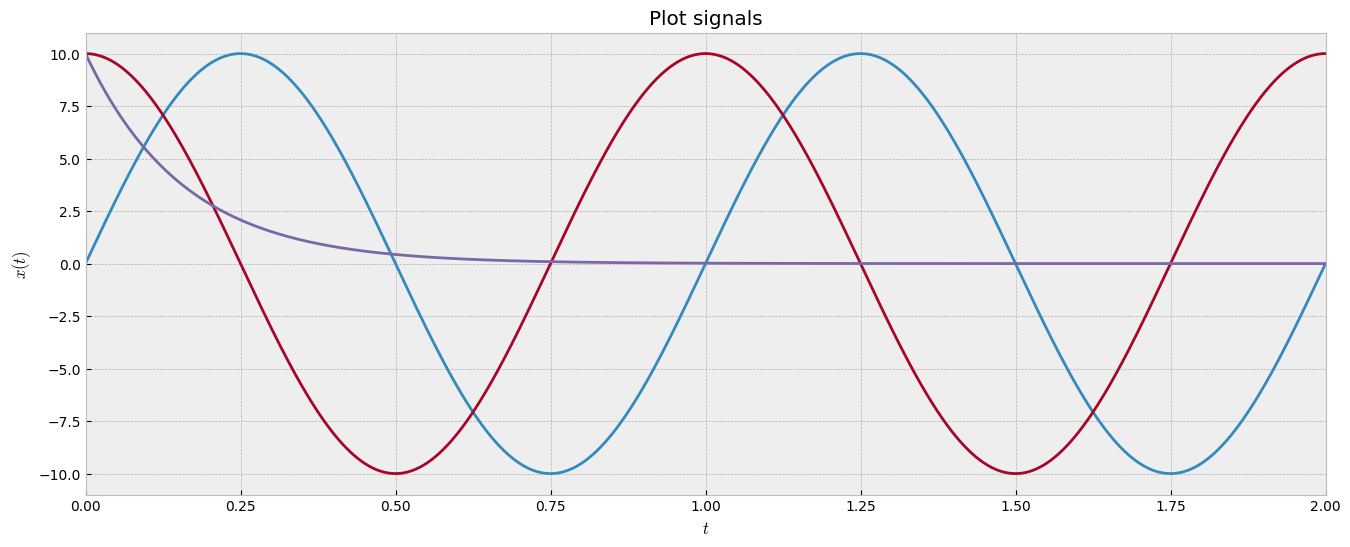

In [3]:
t = np.linspace(0, 2, 2000) # t is defined from 0 to 2 with 2000 points
plt.figure(figsize=(16,6)) 
plt.plot(t, 10 * np.sin(2*np.pi*t))
plt.plot(t, 10 * np.cos(2*np.pi*t))
plt.plot(t, 10 * np.exp(-2*np.pi*t))
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title(r'Plot signals')
plt.xlim([0, 2])
plt.grid(True)
plt.show()

## Discrete

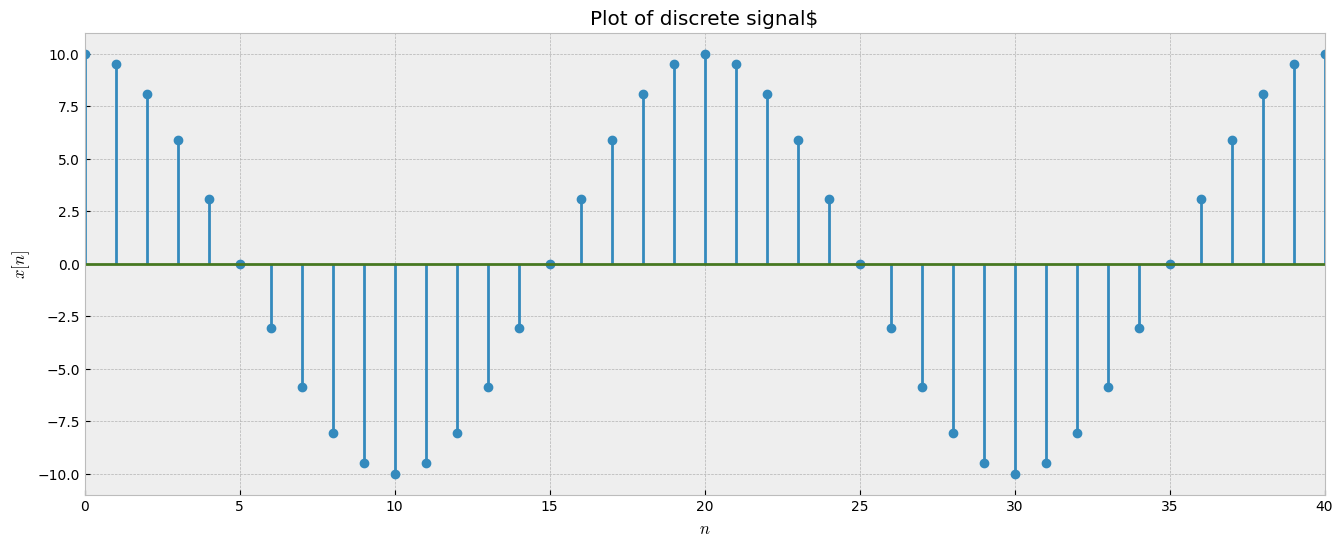

In [4]:
n = np.arange(41); # generete a list with integers from 0 to 40 (41 elements).
dt = 1/20
x = 10 * np.cos(2 * np.pi *  n * dt)
plt.figure(figsize=(16,6)) 
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.xlim([0, 40])
plt.grid(True)
plt.title(r'Plot of discrete signal$');
plt.stem(n, x) # generating this plot style
plt.show()

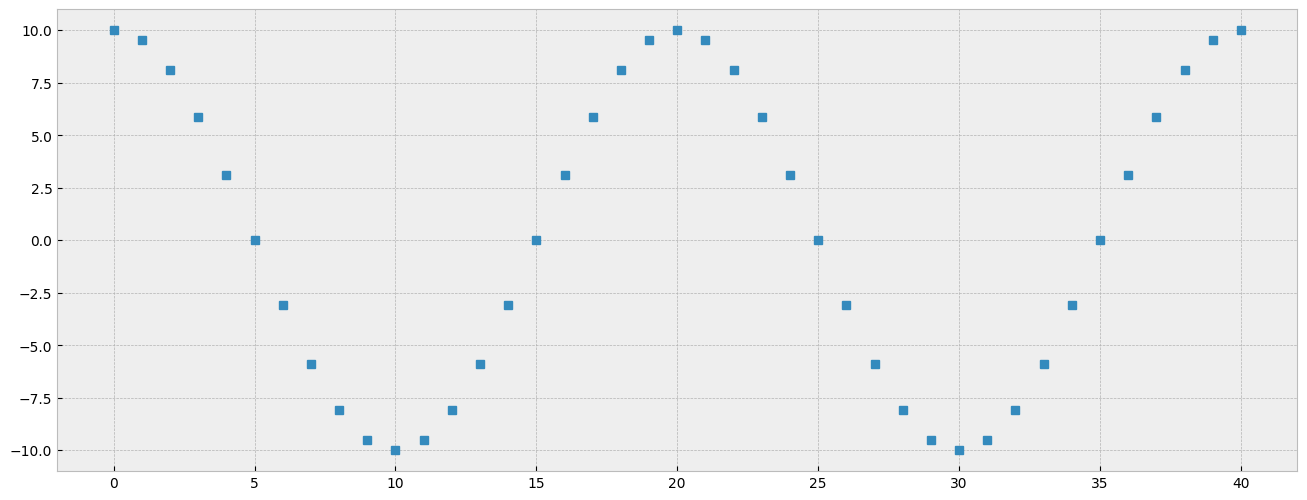

In [5]:
#same plot with different style
plt.figure(figsize=(16,6)) 
plt.plot(n, x, 's');

## Complex numbers

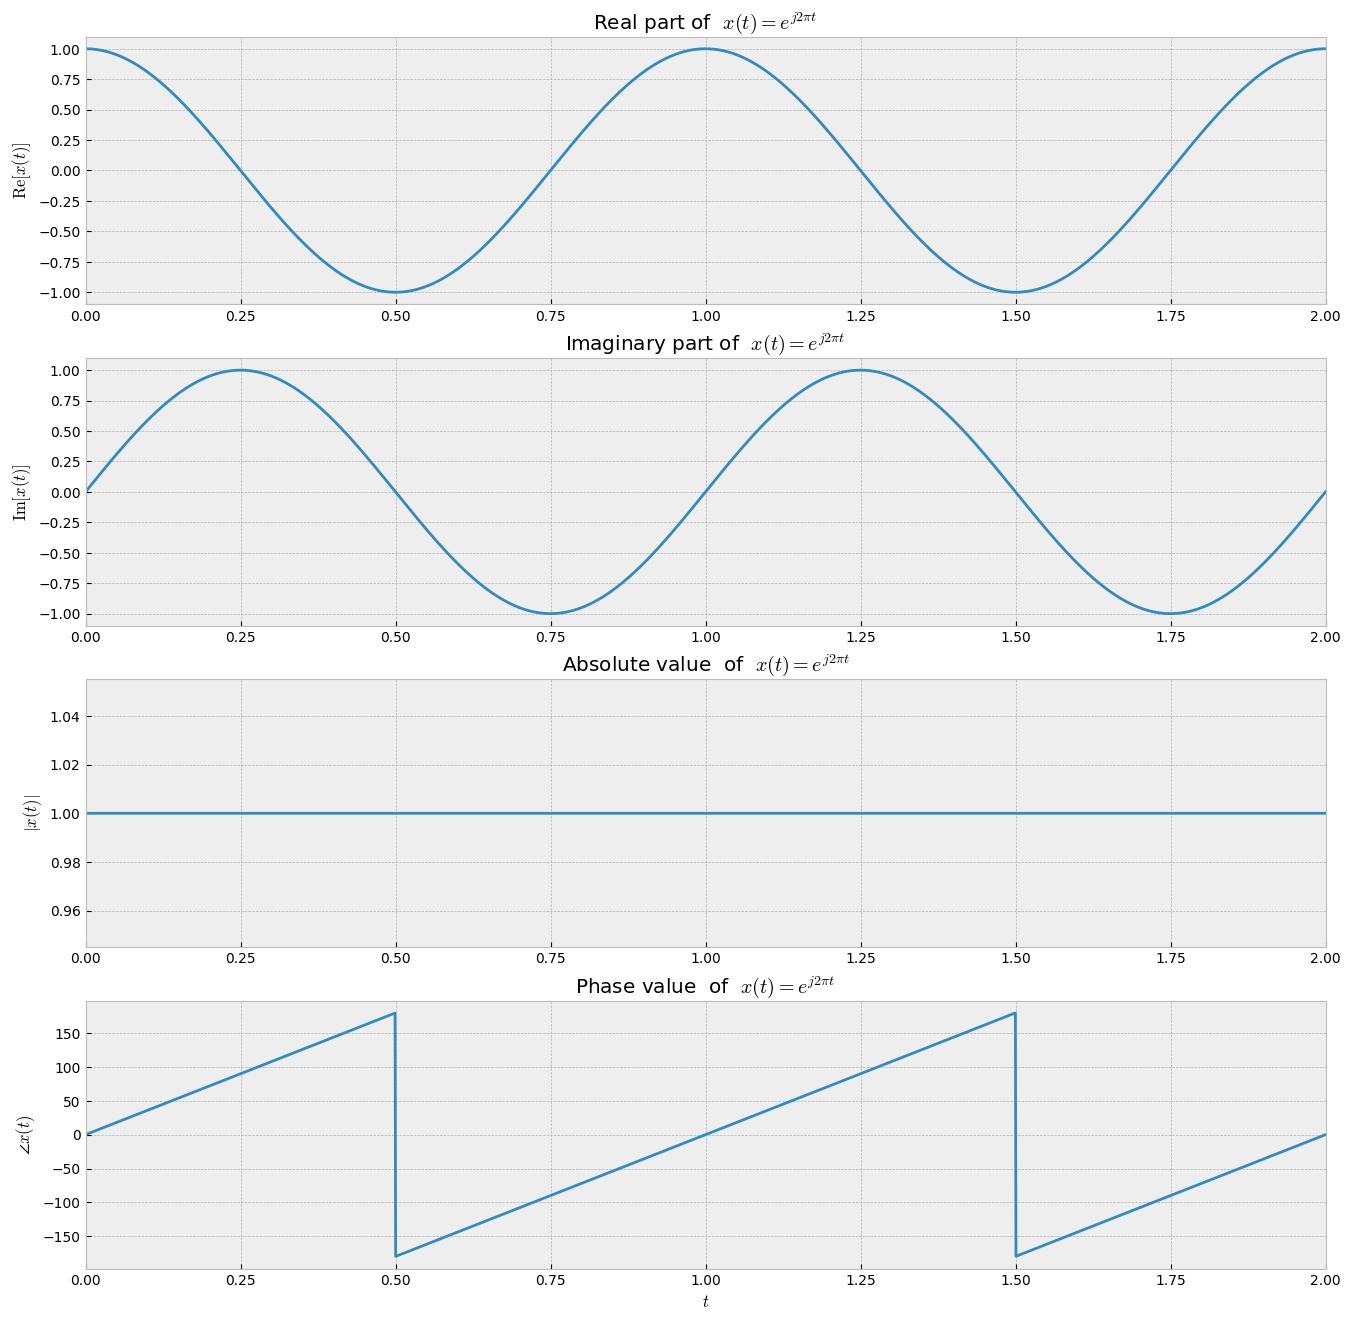

In [6]:
# note that "j=sqrt(-1)"
# careful to use "j", always need to be used like this: "0j" or "1j" or "2j" without "*" symbol
# Refer to https://python-reference.readthedocs.io/en/latest/docs/functions/complex.html
t = np.linspace(0, 2, 2000)
plt.figure(figsize=(16,16)) 
plt.subplot(4,1,1); plt.plot(t, np.exp(2j*np.pi*t).real )
plt.ylabel('$\mathrm{Re}[x(t)]$')
plt.title(r'Real part of  $x(t)=e^{j 2 \pi t}$')
plt.grid(True)
plt.xlim([0, 2])
##
plt.subplot(4,1,2); plt.plot(t, np.exp(2j*np.pi*t).imag )
plt.ylabel('$\mathrm{Im}[x(t)]$')
plt.title(r'Imaginary part of  $x(t)=e^{j 2 \pi t}$')
plt.grid(True)
plt.xlim([0, 2])
##
plt.subplot(4,1,3); plt.plot(t, np.abs(np.exp(2j*np.pi*t)) )
plt.ylabel(r'$|x(t)|$')
plt.title(r'Absolute value  of  $x(t)=e^{j 2 \pi t}$')
plt.grid(True)
plt.xlim([0, 2])
##
plt.subplot(4,1,4); plt.plot(t, np.angle(np.exp(2j*np.pi*t))*360/(2*np.pi) )
plt.xlabel('$t$')
plt.ylabel(r'$\angle x(t)$')
plt.title(r'Phase value  of  $x(t)=e^{j 2 \pi t}$');
plt.grid(True)
plt.xlim([0, 2])
plt.show()

# Symbolic analysis

## Basic operations

- Upload the library as *.sp*
- Improve visualization to become "beautiful" mathematical equations
- Define a plot style so that plotting using *.sp* has a nice visualization

In [7]:
#install missing libraries
! pip install --upgrade sympy

In [8]:
#Symbolic calculation
import sympy as sp
#Improve visualization
sp.init_printing() 
from matplotlib import style
style.use('bmh')
plt.rcParams['figure.figsize'] = 16, 6

First thing to do is to define a symbolic variable "x" so whenever the variable x is used, then it will be related and appear as the symbol x.

In [9]:
#Define a varible in sympy
x = sp.symbols('x')

Now I will define an equation using the symbol x.

In [10]:
eq = 18*x**2 +3*x + 5
eq

Solving the equation *eq* in terms of *x*

In [11]:
#Solving equations
sp.solve(eq, x)

Could we make it more general and find the solution in terms of other symbolic variables? Let's try...

In [12]:
#Solving equations
# as a function o a new variable
a = sp.symbols('a')
b = sp.symbols('b')
eq = x**2 +a*x + b
eq

In [13]:
#Solving equations
solution = sp.solve(eq, x)
solution

In [14]:
#First term
solution[0]

In [15]:
#Second term
solution[1]

We can substitute the symbolic varibles by numerical values.

In [16]:
eq.subs(a,2).subs(b,2)

And define a new equation using the numerical values.

In [17]:
eq2 = eq.subs(a,-2).subs(b,2)
eq2

In [18]:
sp.solve(eq2, x)

Note that the imaginary number in sympy is different from general python notation. It is here used as *sp.I*.

In [19]:
#complex number
x*(2+sp.I)

In [20]:
#getting the phase
sp.arg(8+sp.I)

We can get the numerical value using *sp.N*

In [21]:
sp.N(sp.arg(8+sp.I))

In [22]:
#getting the absolute value
sp.Abs(8+sp.I)

In [23]:
#conjungate
sp.conjugate(1+sp.I)

Let's go back to our solution

In [24]:
solution

In [25]:
sp.Abs(solution[0]).subs(a,-2).subs(b,2)

In [26]:
sp.arg(solution[0]).subs(a,-2).subs(b,2)

In [27]:
solution[1]

In [28]:
sp.Abs(solution[1]).subs(a,-2).subs(b,2)

In [29]:
sp.arg(solution[1]).subs(a,-2).subs(b,2)

Some more symbolic manipulation

In [30]:
solution[0]*solution[1]

In [31]:
#one way
sp.simplify(solution[0]*solution[1])

In [32]:
#other way
(solution[0]*solution[1]).simplify()

In [33]:
solution[1]*solution[1]

We can also define the type of domain the variable is. For example, we will expand *a + b* being both complex numbers.

In [34]:
sp.expand(a + b, complex=True)

It can be also expanded in terms of trigonometric functions.

In [35]:
sp.expand(sp.cos(a + b), trig=True)

It is also possible to expand a function in terms of a given variable. For example, *cos(a)* in terms of *a*.

In [36]:
sp.series(sp.cos(a), a)

Getting limits.

In [37]:
sp.limit(sp.sin(a)/a, a, sp.oo)

In [38]:
sp.limit(sp.sin(a)/a, a, 0)

## Signals

Plot using sympy as *sp.plot*. Sympy uses internally matplotlib, but we cannot configure the plots directly as we did before. 

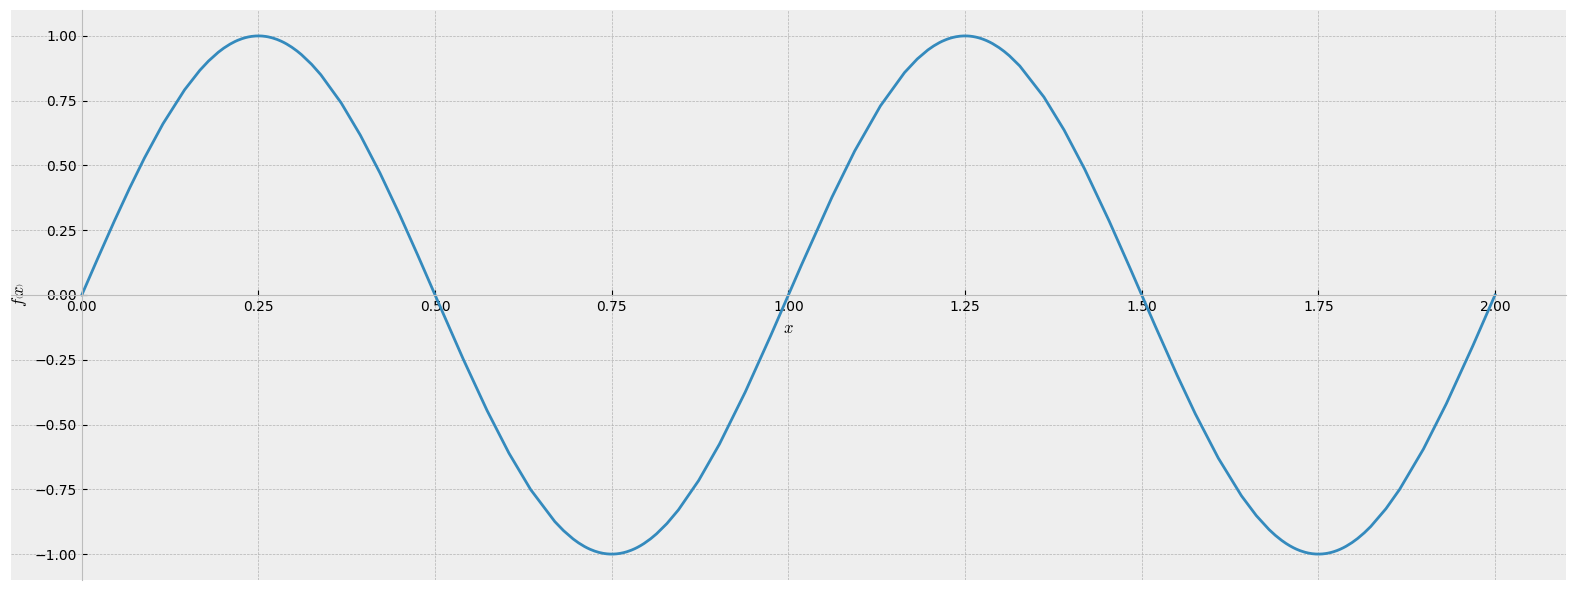

In [39]:
plt.rcParams['figure.figsize'] = 16, 6 # the way to make the plot bigger
sp.plot(sp.sin(2*x*sp.pi), (x, 0, 2));

Ploting more than 1 curve and change line colors. 
- Define the plot as a variable and not show the plot
- Call each curve cointained in the plot variable and configure its color
- Show the plot

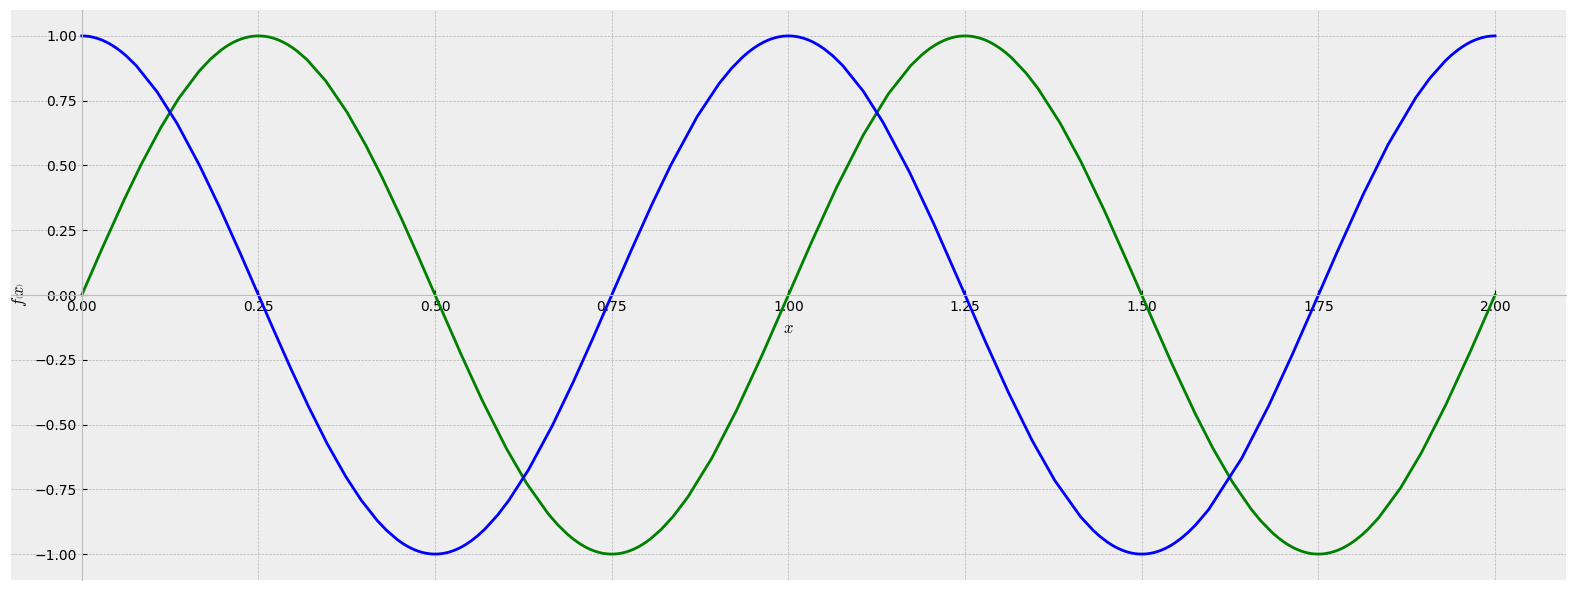

In [40]:
p = sp.plot(sp.sin(2*x*sp.pi),sp.cos(2*x*sp.pi), (x, 0, 2), show=False);
p[0].line_color = 'g'
p[1].line_color = 'b'
p.show()

### Generalizations

In [41]:
#Defining symbols
s = sp.symbols('s')
b = sp.symbols('b')
A = sp.symbols('A')
t = sp.symbols('t')
w = sp.symbols('omega')
f0 = sp.symbols('f_0')
T0 = sp.symbols('T_0')
theta = sp.symbols('theta')
#Defining function symbols
f = sp.Function('f')(t)
g = sp.Function('g')(t)

**Sinusoid signal**

In [42]:
s = A * sp.cos(2 * sp.pi * f0 * t + theta)
s

In [43]:
s.rewrite(sp.exp)

**[Complex exponential](https://en.wikipedia.org/wiki/Euler%27s_formula)**

In [44]:
s = A * sp.exp(sp.I * 2 * sp.pi * f0 * t)
s.rewrite(sp.sin).simplify().trigsimp()

In [45]:
s.rewrite(sp.cos)

**[Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function)**

In [46]:
sp.DiracDelta(t)

In [47]:
sp.DiracDelta(0)

In [48]:
sp.DiracDelta(2)

In [49]:
sp.DiracDelta(-56)

In [50]:
sp.integrate(sp.DiracDelta(t), (t, -sp.oo, sp.oo))

In [51]:
sp.integrate(f * sp.DiracDelta(t-4), (t, -sp.oo, sp.oo))

**[Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)**

In [52]:
sp.Heaviside(t)

In [53]:
sp.diff(sp.Heaviside(t),t)

In [54]:
sp.integrate(sp.DiracDelta(t),t)

In [55]:
sp.integrate(sp.Heaviside(t),t)

In [56]:
sp.Heaviside(-3)

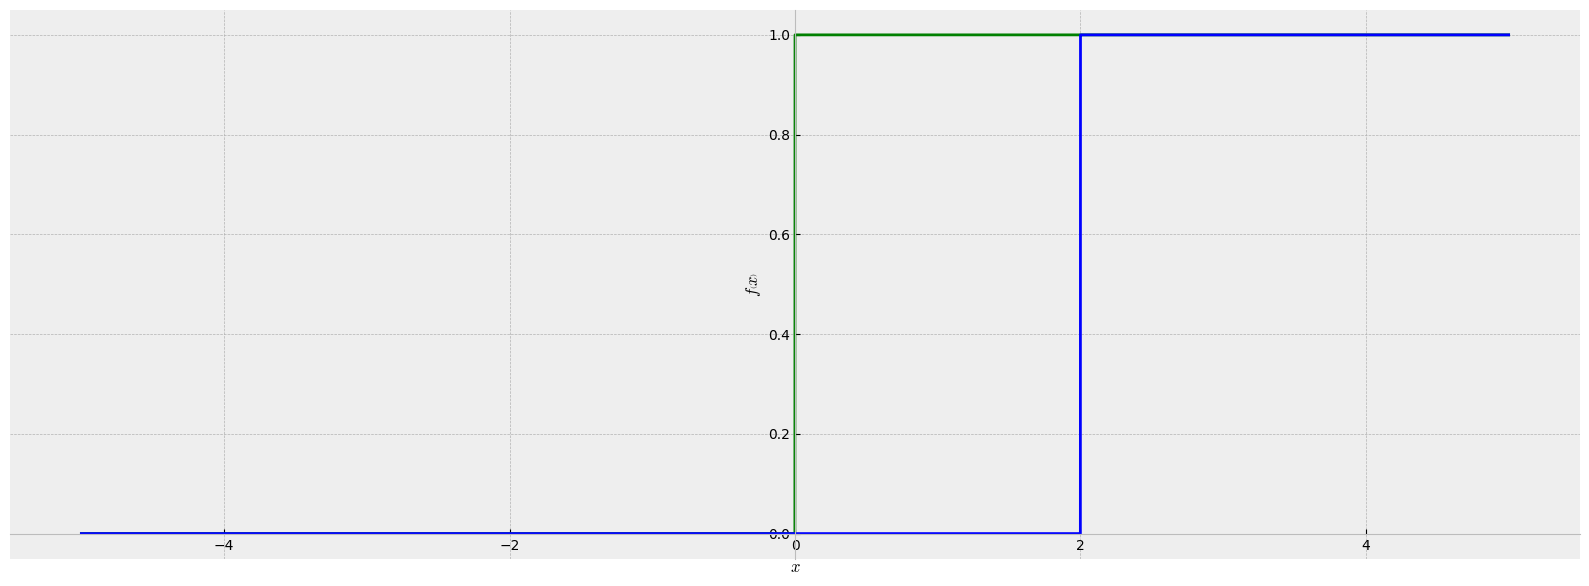

In [57]:
p=sp.plot(sp.Heaviside(x),sp.Heaviside(x-2),(x,-5,5),show=False)
p[0].line_color = 'g'
p[1].line_color = 'b'
p.show()

**Sinc**

$$\mathrm{sinc}(x) = \dfrac{\sin(x)}{x}$$

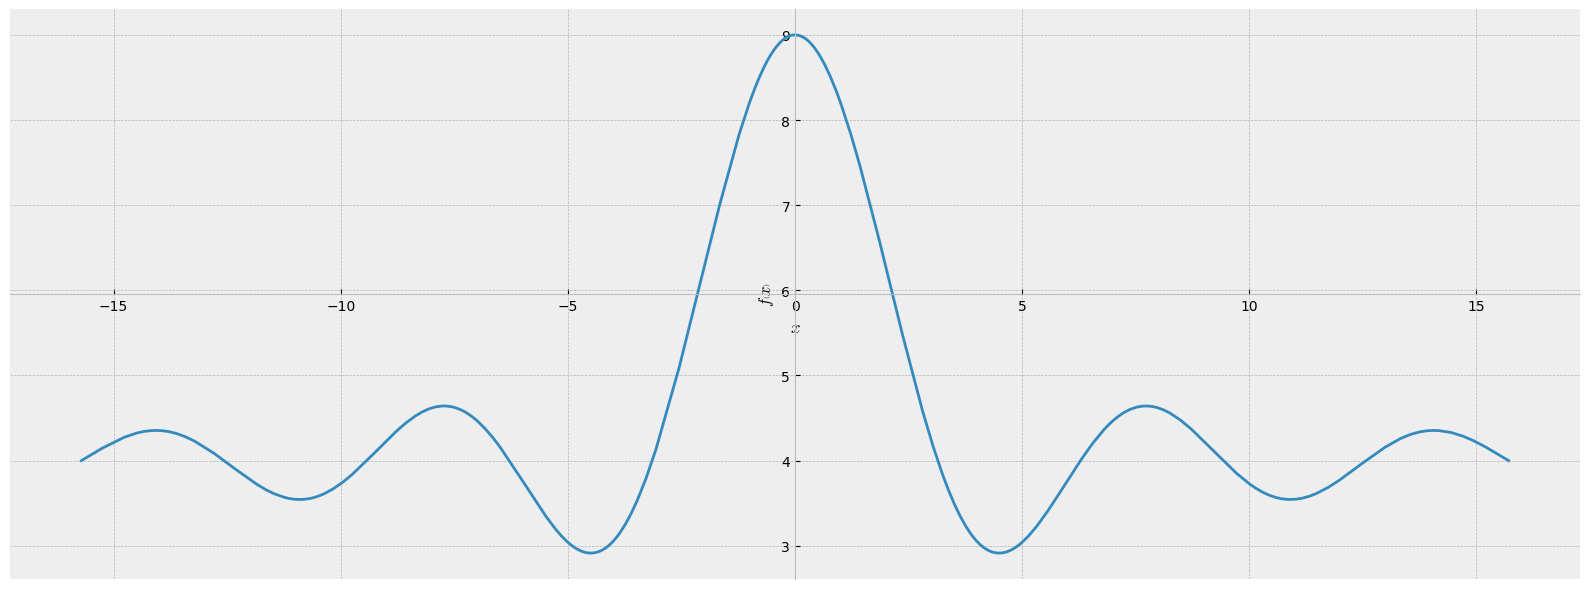

In [58]:
sp.plot(sp.sinc(x)*5 + 4,(x,-5*sp.pi,5*sp.pi));

## Convolution

- It is possible to use different libraries to compute convolution.

- [Scipy signal](https://docs.scipy.org/doc/scipy-1.0.0/reference/signal.html)

- [Scikit-dsp-comm](https://scikit-dsp-comm.readthedocs.io/en/latest/nb_examples.html)

- This is a numerical approach!

- Careful because we using different libraries, it might be possible to have inconsistencies in variable usages.


In [59]:
#getting this library that is not included in azure
! pip install scikit-dsp-comm

In [60]:
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal

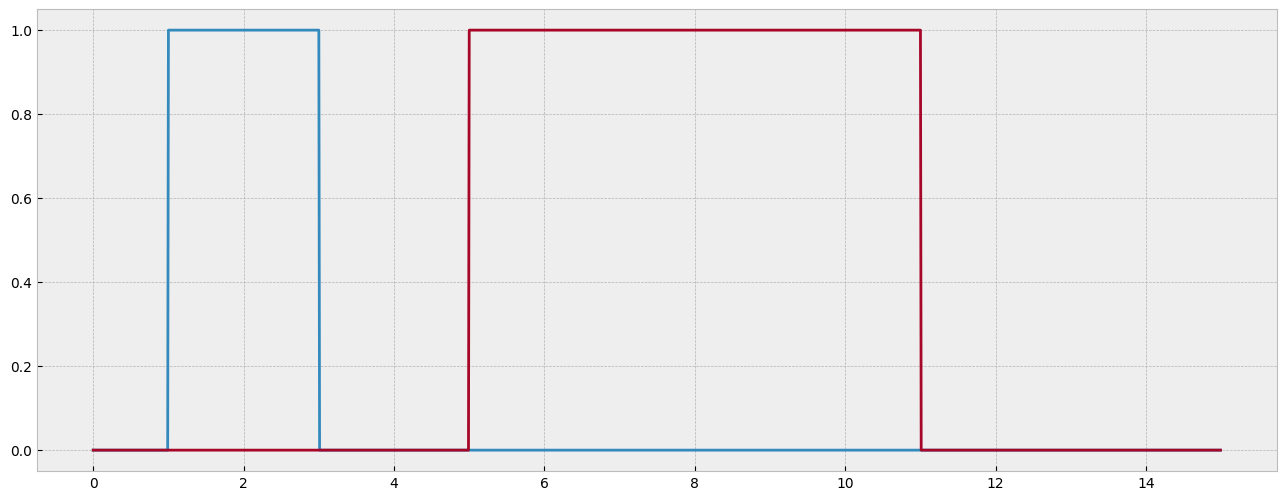

In [61]:
t = np.arange(0,15,.01)
# directy using the retangular pulse function from sk_dsp_comm.sigsys
x_rect1 = ss.rect(t-2,2) ## t - [center of rect], [window lenght]
x_rect2 = ss.rect(t-8,6)
plt.plot(t,x_rect1)
plt.plot(t,x_rect2)

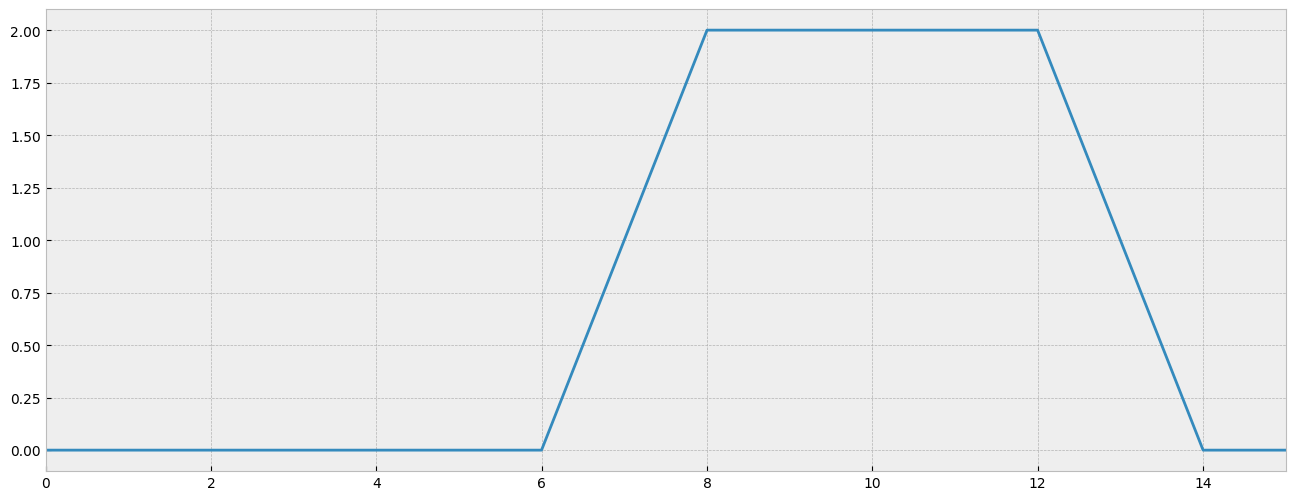

In [62]:
t = np.arange(0,20,.001)
x_rect1 = ss.rect(t-2,2)
x_rect2 = ss.rect(t-8,6)
#find the convolution of these two signals using sk_dsp_comm.sigsys
y,ty = ss.conv_integral(x_rect1,t,x_rect2,t);
plt.plot(ty,y);
plt.xlim([0, 15]);

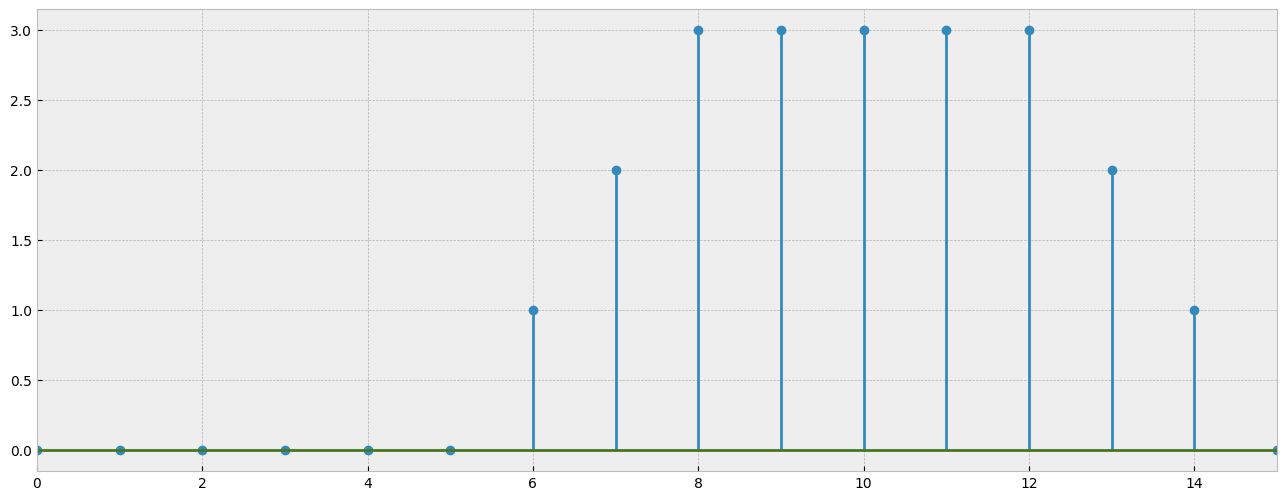

In [63]:
t = np.arange(0,20,1);
x_rect1 = ss.rect(t-2,2);
x_rect2 = ss.rect(t-8,6);
y,ty = ss.conv_integral(x_rect1,t,x_rect2,t)
plt.stem(ty,y)
plt.xlim([0, 15]);

Computing the same convolution with scipy.signal but using the signals created in sk_dsp_comm.sigsys

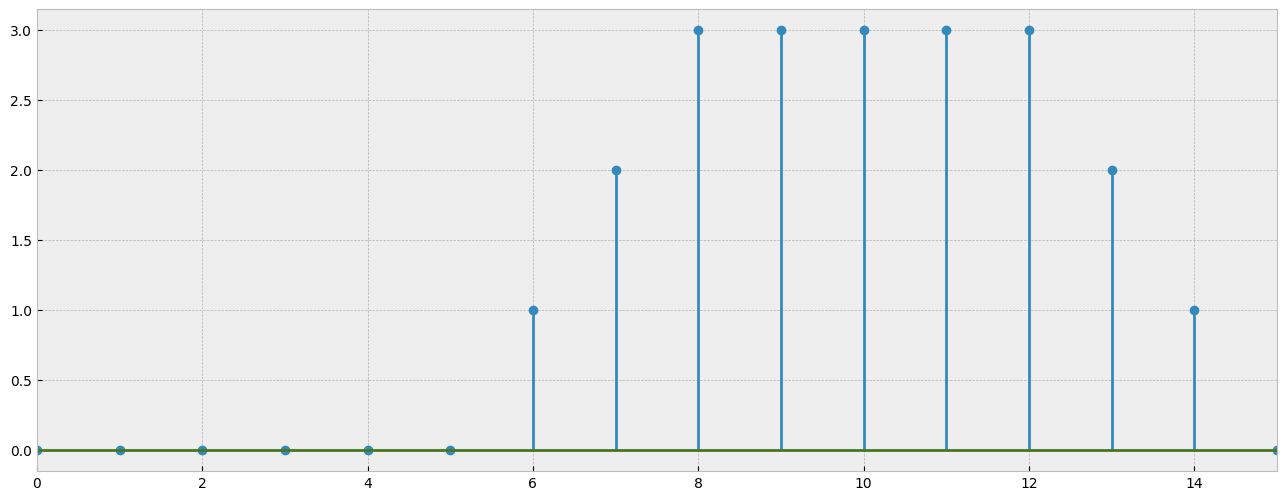

In [64]:
#Computing the same convolution with scipy.signal but using the signals created in sk_dsp_comm.sigsys
k = np.arange(0, 20, 1)
x_rect1 = ss.rect(k-2,2)
x_rect2 = ss.rect(k-8,6)
y = signal.convolve(x_rect1,x_rect2)
plt.stem(y)
plt.xlim([0, 15]);

Direct convolution using sympy is not so simple so I will skip...

## Other symbolic analysis

**[Fourier series](https://en.wikipedia.org/wiki/Fourier_series)** - remember that this is possible for periodic signals!

In [65]:
s = sp.fourier_series(a * x**3, (x, -sp.pi, sp.pi))

In [66]:
s

We can show it as complex exponential

In [67]:
s.rewrite(sp.exp)

Or truncate it...

In [68]:
s.truncate(3)

In [69]:
s.rewrite(sp.exp).truncate(n=3)

**Fourier series of train of impulses**

In [70]:
s = sp.fourier_series(sp.DiracDelta(x), (x, -T0/2, T0/2))
s.truncate(3)

** Fourier series of a pulses: 1 from 0 to $T_0/2$ and 0 from  $T_0/2$ to $T_0$, where $T_0$ is the period**

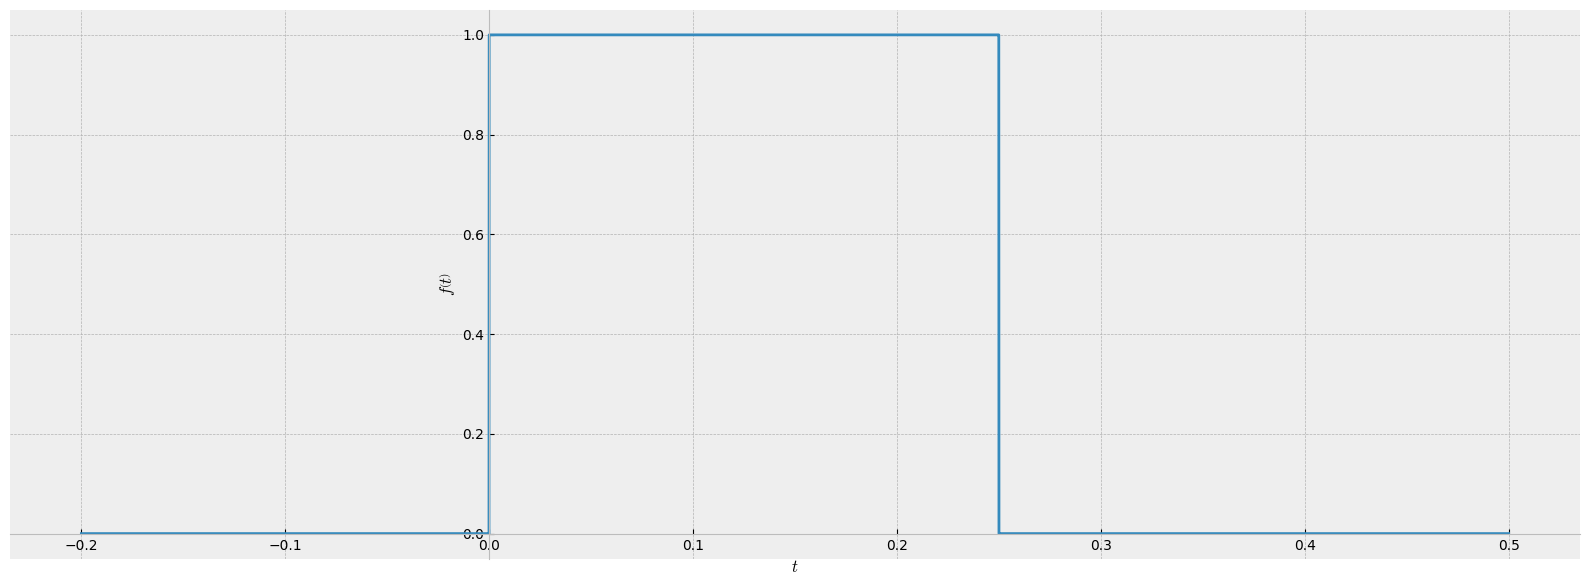

In [71]:
#Example of one pulse
t = sp.symbols('t')
sp.plot(sp.Heaviside(t) - sp.Heaviside(t - 1/4), (t, -0.2, 0.5));

In [72]:
s = sp.fourier_series(sp.Heaviside(x) - sp.Heaviside(x - 1/4) , (x, 0, 1))
s.truncate(3)

In [73]:
s = sp.fourier_series(sp.Heaviside(t) - sp.Heaviside(t - T0/2) , (t, 0, T0))
s.truncate(1)

In [74]:
s.truncate(1).simplify()

In [75]:
s.truncate(1).subs(T0,1)

**[Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform)** 

- Obtained as the Fourier series when the period tends to infinity (generalization)
- [Verify with a table](https://www.astro.umd.edu/~lgm/ASTR410/ft_ref3.pdf)

In [76]:
sp.fourier_transform(sp.exp(-a * t) * sp.Heaviside(t),t,w)

In [77]:
sp.fourier_transform(sp.exp(-a * sp.Abs(t)),t,w)

In [78]:
sp.fourier_transform(sp.Heaviside(t),t,w)

In [79]:
sp.fourier_transform(sp.DiracDelta(t),t,w)

### Find the sinc and retangular signals as a Fourier transform pair

In [80]:
sp.fourier_transform(sp.sinc(t),t,w)

⎧       ⎛            -1 ⎞                     ⎛    -1         1 ⎞   ⎛         
⎪π  for ⎜ω > 0 ∨ ω > ───⎟ ∧ (ω > 0 ∨ ω < 0) ∧ ⎜ω > ─── ∨ ω < ───⎟ ∧ ⎜ω < 0 ∨ ω
⎨       ⎝            2⋅π⎠                     ⎝    2⋅π       2⋅π⎠   ⎝         
⎪                                                                             
⎩0                                      otherwise                             

    1 ⎞
 < ───⎟
   2⋅π⎠
       
       

In [81]:
sp.fourier_transform(sp.Heaviside(t+sp.pi/2) - sp.Heaviside(t-sp.pi/2),t,w)

In [82]:
s = sp.fourier_transform(sp.Heaviside(t+sp.pi/2) - sp.Heaviside(t-sp.pi/2),t,w).rewrite(sp.sin)
s

In [83]:
s.simplify()

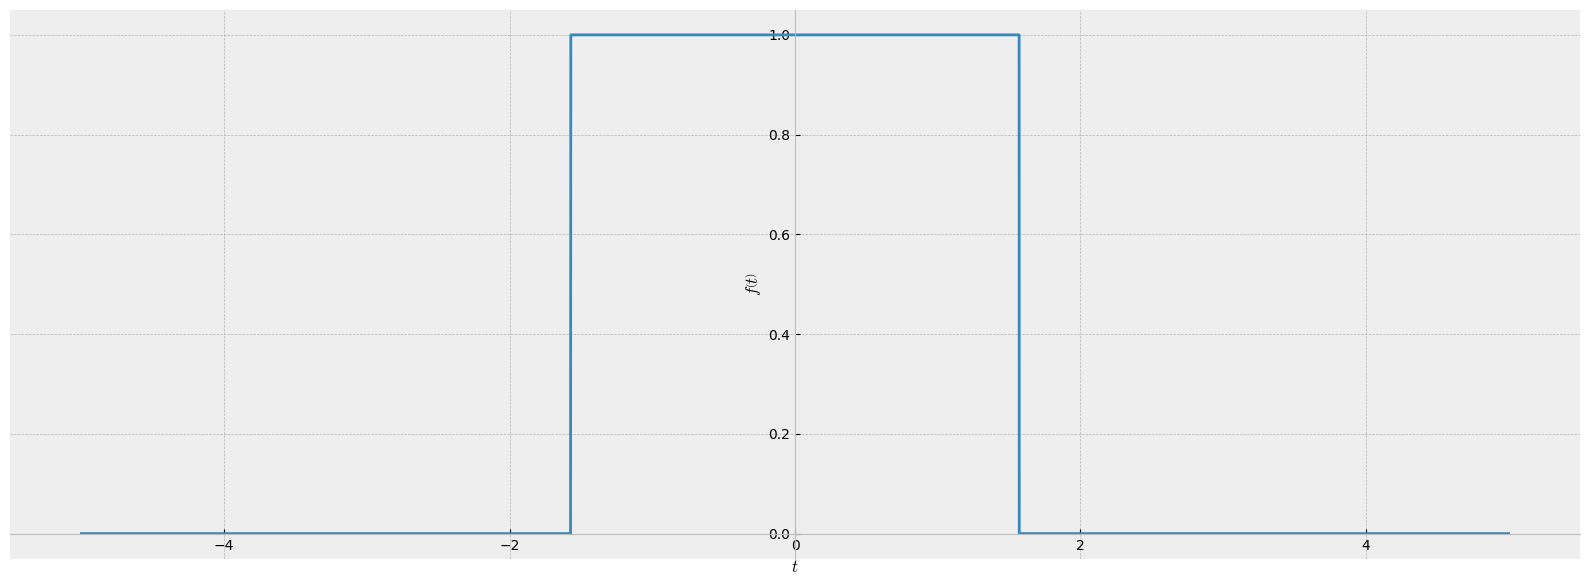

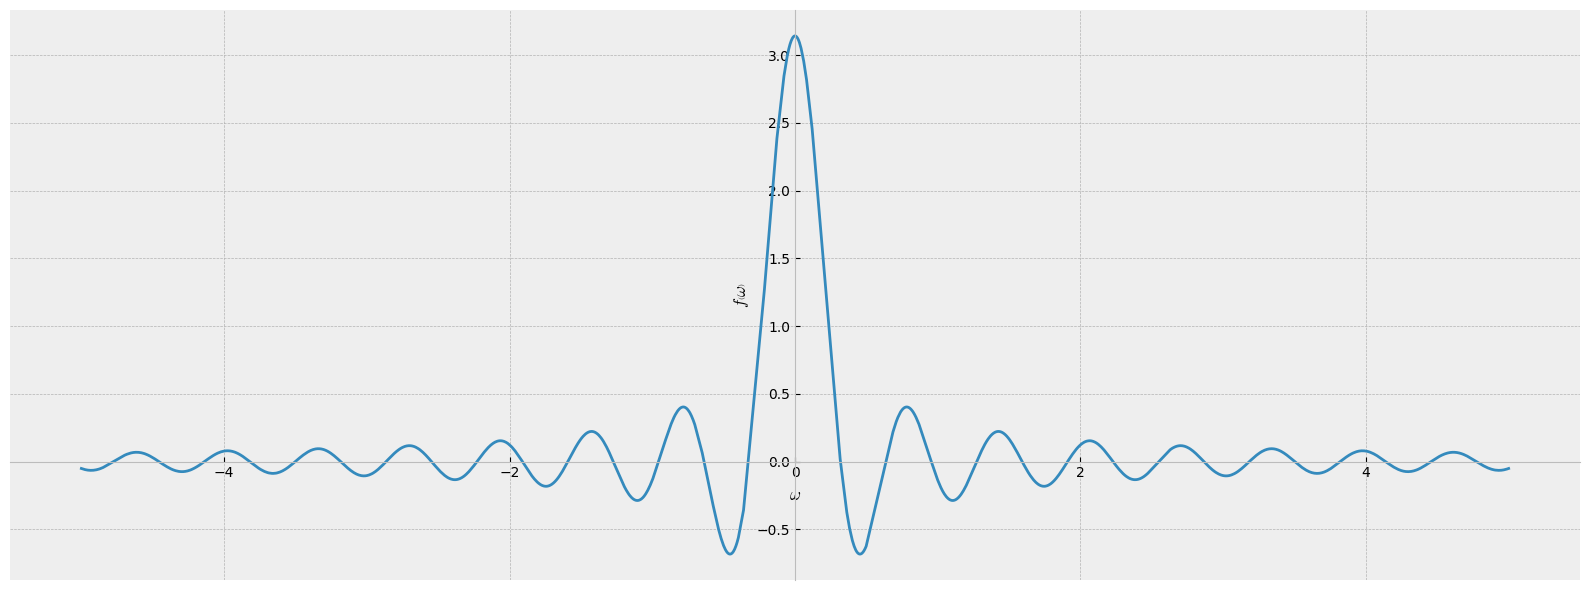

In [84]:
sp.plot(sp.Heaviside(t+sp.pi/2) - sp.Heaviside(t-sp.pi/2), (t, -5, 5));
sp.plot(s,(w,-5,5));